# Final Project Report

* Class: DS 5100
* Student Name: Luke Schneider
* Student Net ID: vrd9sd
* This URL: https://github.com/lukeschneider7/DS5100-FP1/blob/main/DS51200_FinalProjectTemplate.ipynb 

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/lukeschneider7/DS5100-FP1/tree/main/montecarlo 

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [6]:
# A code block with your classes.
''' import numpy as np
import pandas as pd
import random


class Die():
    """Initialize a die with faces given as a numpy array and a weight for each face
    - Include methods for changing weights, rolling die, and returning die df
    """
    def __init__(self, faces):
        """ Internally initialize weights to 1 for each face
        - Throw TypeError if not NumPy array, raise ValueError if array values not distinct
        - Save faces and weights in private df w/ faces in index
        Args:
            faces: (array) NumPy array faces str/num dtype
        """
        self.faces = faces
        if not isinstance(faces, np.ndarray): 
            raise TypeError("Faces given not a NumPy array")
        elif faces.size != np.unique(faces).size: 
            raise ValueError("Array values not unique")
        else: 
            weights = np.ones(faces.size)
            faces = faces.flatten()
            self._df = pd.DataFrame({'values': weights}, index=faces)    


    def change_weight(self, face_to_change, weight_new ):
        """ Change weight of single face of die
        - Raise IndexError if face_value not in die array
        - Raise TypeError if weight_new is not valid type (int/float or castable as numeric)
        Args:
            face_to_change = face value to change
            weight_new = (str/int/float) new weight for face
        """
        if np.isin(face_to_change, self.faces)==False:
            raise IndexError("Face value not in die array")
        elif type(float(weight_new))!= float:
            raise TypeError("Weight_new arg must be int/float or castable as num")
        else:
            self._df.loc[face_to_change] = weight_new


    def roll_die(self, times=1):
        """ Roll die one or more times, returning outcomes
        Args:
            times: (int) times die is to be rolled
        Returns:
            outcomes: (list) Python list of outcomes not internally stored
        """
        outcomes = random.choices(self._df.index.tolist(), weights=self._df['values'], k=times)
        return outcomes
    

    def get_state(self):
        """ Returns a COPY of private die data frame
        """
        df_copy = self._df.copy()
        return df_copy
        


class Game():
    """ Rolling one or more similar die one or more times
    - Each die in a game have same num sides and associated faces, own weights
    - Initialize w/ list that has one or more dice
    - Only keep results of most recent play
    """
    def __init__(self, dice_list):
        """ Takes list of alredy instantiated similar die
        Args:
            similar_die: (list) instantiated similar die"""
        self.similar_dice_list = dice_list


    def play(self, times_to_roll):
        """Saves result of play to private df wide format 
        Args:
            times_to_roll (int) how many times die should be rolled
        """
        outcomes = list()
        self.times_to_roll = times_to_roll
        for die in self.similar_dice_list:
            outcomes.append(die.roll_die(times_to_roll)) # list of outcomes 
        self._df_play = pd.DataFrame(index= range(1, times_to_roll+1), 
                                    columns = range(len(self.similar_dice_list)))
        self._df_play[:] = [[outcomes[i][j] for i in range(len(outcomes))] for j in range(len(outcomes[0]))]
    

    def result(self, narrow_or_wide='wide'):
        """Returns copy of private play() df to user, raise ValueError if invalid arg
        Args:
            narrow_or_wide: (str) indicating df to be returned narrow or wide
        Returns:
            copy_df : (dataframe) copy of private df from play() method
        """
        self.copy_df = self._df_play.copy()
        if narrow_or_wide.lower() != 'narrow' and narrow_or_wide.lower() != 'wide':
            raise ValueError("specify 'narrow' or 'wide' df format to be returned")
        elif narrow_or_wide.lower() == 'narrow':
            self.copy_df = pd.melt(self.copy_df.reset_index(), id_vars=['index'], var_name='variable', value_name='value')
            self.copy_df.rename(columns={'index': 'roll',
                                         'variable': 'die',
                                         'value': 'face' }, inplace=True)
            return self.copy_df
        else:
            return self.copy_df



class Analyzer():
    """Takes results of a single game and computes descriptive stats about it
    """
    def __init__(self, game_object):
        """Instantiates a Game object, throws value error if not passed game object
        Args:
            game_object: a game object 
        """
        self.game_object = game_object


    def jackpot(self):
        """Computes how many times a game results in jackpot(all faces same)
        Returns:
            jackpots: (int) integer for number of jackpots
        """
        jackpots = 0
        df_narrow = self.game_object.result(narrow_or_wide='narrow')

        for i in range(1, self.game_object.times_to_roll+1):
            faces_each_die = df_narrow.loc[df_narrow['roll'] == i, ['face']]
            if len(faces_each_die['face'].unique()) == 1:
                jackpots += 1
        return jackpots


    def face_counts(self):
        """Computes how many times a given face is rolled in each event
        Returns:
            face_count: (DataFrame) index roll number, faces for columns, counts as values in cells
        """
        result = self.game_object.result(narrow_or_wide='wide')

        face_count = pd.DataFrame(0, index=range(1, self.game_object.times_to_roll+1) ,
                                   columns=self.game_object.similar_dice_list[0].faces)
        
        for i in result.index: # Use roll i(1,2,3)
            counts = result.loc[i].value_counts() # Count num of each face in i row
            face_count.loc[i, counts.index] = counts # Fill in i row, and counts.index(a face) column with counts data
        return face_count


    def combo_count(self):
        """Computes distinct combinations of faces rolled along with counts
        Returns:
            combo_counts: (DataFrame) multiindex of distinct combos and column for associated counts
        """
        result = self.game_object.result(narrow_or_wide='wide')
        sorted_combos = result.apply(lambda x: tuple(sorted(x)), axis=1)
        combo_counts = sorted_combos.value_counts().rename_axis('Distinct Face Combos').reset_index(name='Count')
        combo_counts.set_index('Distinct Face Combos', inplace=True)
        combo_counts
        return combo_counts


    def permutation_count(self):
        """Computes distinct permutations of faces rolled, along with counts
        Returns:
            permu_count: (DataFrame) mutltiindex of distinct permutations and column for associated counts
        """
        result = self.game_object.result(narrow_or_wide='wide')
        face_combos = result.apply(tuple, axis=1)
        face_counts = face_combos.value_counts()
        permu_counts = face_counts.rename_axis('Distinct Face Permutations').reset_index(name='Count')
        permu_counts.set_index('Distinct Face Permutations', inplace=True)
        permu_counts
        return permu_counts'''

' import numpy as np\nimport pandas as pd\nimport random\n\n\nclass Die():\n    """Initialize a die with faces given as a numpy array and a weight for each face\n    - Include methods for changing weights, rolling die, and returning die df\n    """\n    def __init__(self, faces):\n        """ Internally initialize weights to 1 for each face\n        - Throw TypeError if not NumPy array, raise ValueError if array values not distinct\n        - Save faces and weights in private df w/ faces in index\n        Args:\n            faces: (array) NumPy array faces str/num dtype\n        """\n        self.faces = faces\n        if not isinstance(faces, np.ndarray): \n            raise TypeError("Faces given not a NumPy array")\n        elif faces.size != np.unique(faces).size: \n            raise ValueError("Array values not unique")\n        else: \n            weights = np.ones(faces.size)\n            faces = faces.flatten()\n            self._df = pd.DataFrame({\'values\': weights}, index=f

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [7]:
# A code block with your test code.
'''import numpy as np
import pandas as pd
import random


class Die():
    """Initialize a die with faces given as a numpy array and a weight for each face
    - Include methods for changing weights, rolling die, and returning die df
    """
    def __init__(self, faces):
        """ Internally initialize weights to 1 for each face
        - Throw TypeError if not NumPy array, raise ValueError if array values not distinct
        - Save faces and weights in private df w/ faces in index
        Args:
            faces: (array) NumPy array faces str/num dtype
        """
        self.faces = faces
        if not isinstance(faces, np.ndarray): 
            raise TypeError("Faces given not a NumPy array")
        elif faces.size != np.unique(faces).size: 
            raise ValueError("Array values not unique")
        else: 
            weights = np.ones(faces.size)
            faces = faces.flatten()
            self._df = pd.DataFrame({'values': weights}, index=faces)    


    def change_weight(self, face_to_change, weight_new ):
        """ Change weight of single face of die
        - Raise IndexError if face_value not in die array
        - Raise TypeError if weight_new is not valid type (int/float or castable as numeric)
        Args:
            face_to_change = face value to change
            weight_new = (str/int/float) new weight for face
        """
        if np.isin(face_to_change, self.faces)==False:
            raise IndexError("Face value not in die array")
        elif type(float(weight_new))!= float:
            raise TypeError("Weight_new arg must be int/float or castable as num")
        else:
            self._df.loc[face_to_change] = weight_new


    def roll_die(self, times=1):
        """ Roll die one or more times, returning outcomes
        Args:
            times: (int) times die is to be rolled
        Returns:
            outcomes: (list) Python list of outcomes not internally stored
        """
        outcomes = random.choices(self._df.index.tolist(), weights=self._df['values'], k=times)
        return outcomes
    

    def get_state(self):
        """ Returns a COPY of private die data frame
        """
        df_copy = self._df.copy()
        return df_copy
        


class Game():
    """ Rolling one or more similar die one or more times
    - Each die in a game have same num sides and associated faces, own weights
    - Initialize w/ list that has one or more dice
    - Only keep results of most recent play
    """
    def __init__(self, dice_list):
        """ Takes list of alredy instantiated similar die
        Args:
            similar_die: (list) instantiated similar die"""
        self.similar_dice_list = dice_list


    def play(self, times_to_roll):
        """Saves result of play to private df wide format 
        Args:
            times_to_roll (int) how many times die should be rolled
        """
        outcomes = list()
        self.times_to_roll = times_to_roll
        for die in self.similar_dice_list:
            outcomes.append(die.roll_die(times_to_roll)) # list of outcomes 
        self._df_play = pd.DataFrame(index= range(1, times_to_roll+1), 
                                    columns = range(len(self.similar_dice_list)))
        self._df_play[:] = [[outcomes[i][j] for i in range(len(outcomes))] for j in range(len(outcomes[0]))]
    

    def result(self, narrow_or_wide='wide'):
        """Returns copy of private play() df to user, raise ValueError if invalid arg
        Args:
            narrow_or_wide: (str) indicating df to be returned narrow or wide
        Returns:
            copy_df : (dataframe) copy of private df from play() method
        """
        self.copy_df = self._df_play.copy()
        if narrow_or_wide.lower() != 'narrow' and narrow_or_wide.lower() != 'wide':
            raise ValueError("specify 'narrow' or 'wide' df format to be returned")
        elif narrow_or_wide.lower() == 'narrow':
            self.copy_df = pd.melt(self.copy_df.reset_index(), id_vars=['index'], var_name='variable', value_name='value')
            self.copy_df.rename(columns={'index': 'roll',
                                         'variable': 'die',
                                         'value': 'face' }, inplace=True)
            return self.copy_df
        else:
            return self.copy_df



class Analyzer():
    """Takes results of a single game and computes descriptive stats about it
    """
    def __init__(self, game_object):
        """Instantiates a Game object, throws value error if not passed game object
        Args:
            game_object: a game object 
        """
        self.game_object = game_object


    def jackpot(self):
        """Computes how many times a game results in jackpot(all faces same)
        Returns:
            jackpots: (int) integer for number of jackpots
        """
        jackpots = 0
        df_narrow = self.game_object.result(narrow_or_wide='narrow')

        for i in range(1, self.game_object.times_to_roll+1):
            faces_each_die = df_narrow.loc[df_narrow['roll'] == i, ['face']]
            if len(faces_each_die['face'].unique()) == 1:
                jackpots += 1
        return jackpots


    def face_counts(self):
        """Computes how many times a given face is rolled in each event
        Returns:
            face_count: (DataFrame) index roll number, faces for columns, counts as values in cells
        """
        result = self.game_object.result(narrow_or_wide='wide')

        face_count = pd.DataFrame(0, index=range(1, self.game_object.times_to_roll+1) ,
                                   columns=self.game_object.similar_dice_list[0].faces)
        
        for i in result.index: # Use roll i(1,2,3)
            counts = result.loc[i].value_counts() # Count num of each face in i row
            face_count.loc[i, counts.index] = counts # Fill in i row, and counts.index(a face) column with counts data
        return face_count


    def combo_count(self):
        """Computes distinct combinations of faces rolled along with counts
        Returns:
            combo_counts: (DataFrame) multiindex of distinct combos and column for associated counts
        """
        result = self.game_object.result(narrow_or_wide='wide')
        sorted_combos = result.apply(lambda x: tuple(sorted(x)), axis=1)
        combo_counts = sorted_combos.value_counts().rename_axis('Distinct Face Combos').reset_index(name='Count')
        combo_counts.set_index('Distinct Face Combos', inplace=True)
        combo_counts
        return combo_counts


    def permutation_count(self):
        """Computes distinct permutations of faces rolled, along with counts
        Returns:
            permu_count: (DataFrame) mutltiindex of distinct permutations and column for associated counts
        """
        result = self.game_object.result(narrow_or_wide='wide')
        face_combos = result.apply(tuple, axis=1)
        face_counts = face_combos.value_counts()
        permu_counts = face_counts.rename_axis('Distinct Face Permutations').reset_index(name='Count')
        permu_counts.set_index('Distinct Face Permutations', inplace=True)
        permu_counts
        return permu_counts
'''

'import numpy as np\nimport pandas as pd\nimport random\n\n\nclass Die():\n    """Initialize a die with faces given as a numpy array and a weight for each face\n    - Include methods for changing weights, rolling die, and returning die df\n    """\n    def __init__(self, faces):\n        """ Internally initialize weights to 1 for each face\n        - Throw TypeError if not NumPy array, raise ValueError if array values not distinct\n        - Save faces and weights in private df w/ faces in index\n        Args:\n            faces: (array) NumPy array faces str/num dtype\n        """\n        self.faces = faces\n        if not isinstance(faces, np.ndarray): \n            raise TypeError("Faces given not a NumPy array")\n        elif faces.size != np.unique(faces).size: \n            raise ValueError("Array values not unique")\n        else: \n            weights = np.ones(faces.size)\n            faces = faces.flatten()\n            self._df = pd.DataFrame({\'values\': weights}, index=fa

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [3]:
# A text block with the output of a successful test.
''' (.venv) (base) luke@Lukes-MacBook-Pro DS5100-FP1 % /Users/luke/Documents/5100/DS5100-FP1/.venv/bin/python /Users/luke/Documents/5100/DS5100-FP1/montecarlo_test.py
............
----------------------------------------------------------------------
Ran 12 tests in 0.016s

OK '''

' (.venv) (base) luke@Lukes-MacBook-Pro DS5100-FP1 % /Users/luke/Documents/5100/DS5100-FP1/.venv/bin/python /Users/luke/Documents/5100/DS5100-FP1/montecarlo_test.py\n............\n----------------------------------------------------------------------\nRan 12 tests in 0.016s\n\nOK '

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [3]:
# e.g. import montecarlo.montecarlo
from montecarlo import montecarlo

    0  1
1   T  T
2   T  T
3   T  T
4   H  H
5   T  H
.. .. ..
76  T  H
77  H  T
78  H  H
79  H  H
80  T  T

[80 rows x 2 columns]
     roll die face
0       1   0    T
1       2   0    T
2       3   0    T
3       4   0    H
4       5   0    T
..    ...  ..  ...
155    76   1    H
156    77   1    T
157    78   1    H
158    79   1    H
159    80   1    T

[160 rows x 3 columns]
41


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
# help(montecarlo)
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game_object)
     |  
     |  Takes results of a single game and computes descriptive stats about it
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game_object)
     |      Instantiates a Game object, throws value error if not passed game object
     |      Args:
     |          game_object: a game object
     |  
     |  combo_count(self)
     |      Computes distinct combinations of faces rolled along with counts
     |      Returns:
     |          combo_counts: (DataFrame) multiindex of distinct combos and column for associated counts
     |  
     |  face_counts(self)
     |      Computes how many times a given face is rolled in each event
     |      Returns:
     |          face_count: (DataFrame) index roll number, faces for columns, counts as v

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/lukeschneider7/DS5100-FP1/blob/main/README.md 

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Pasted code 
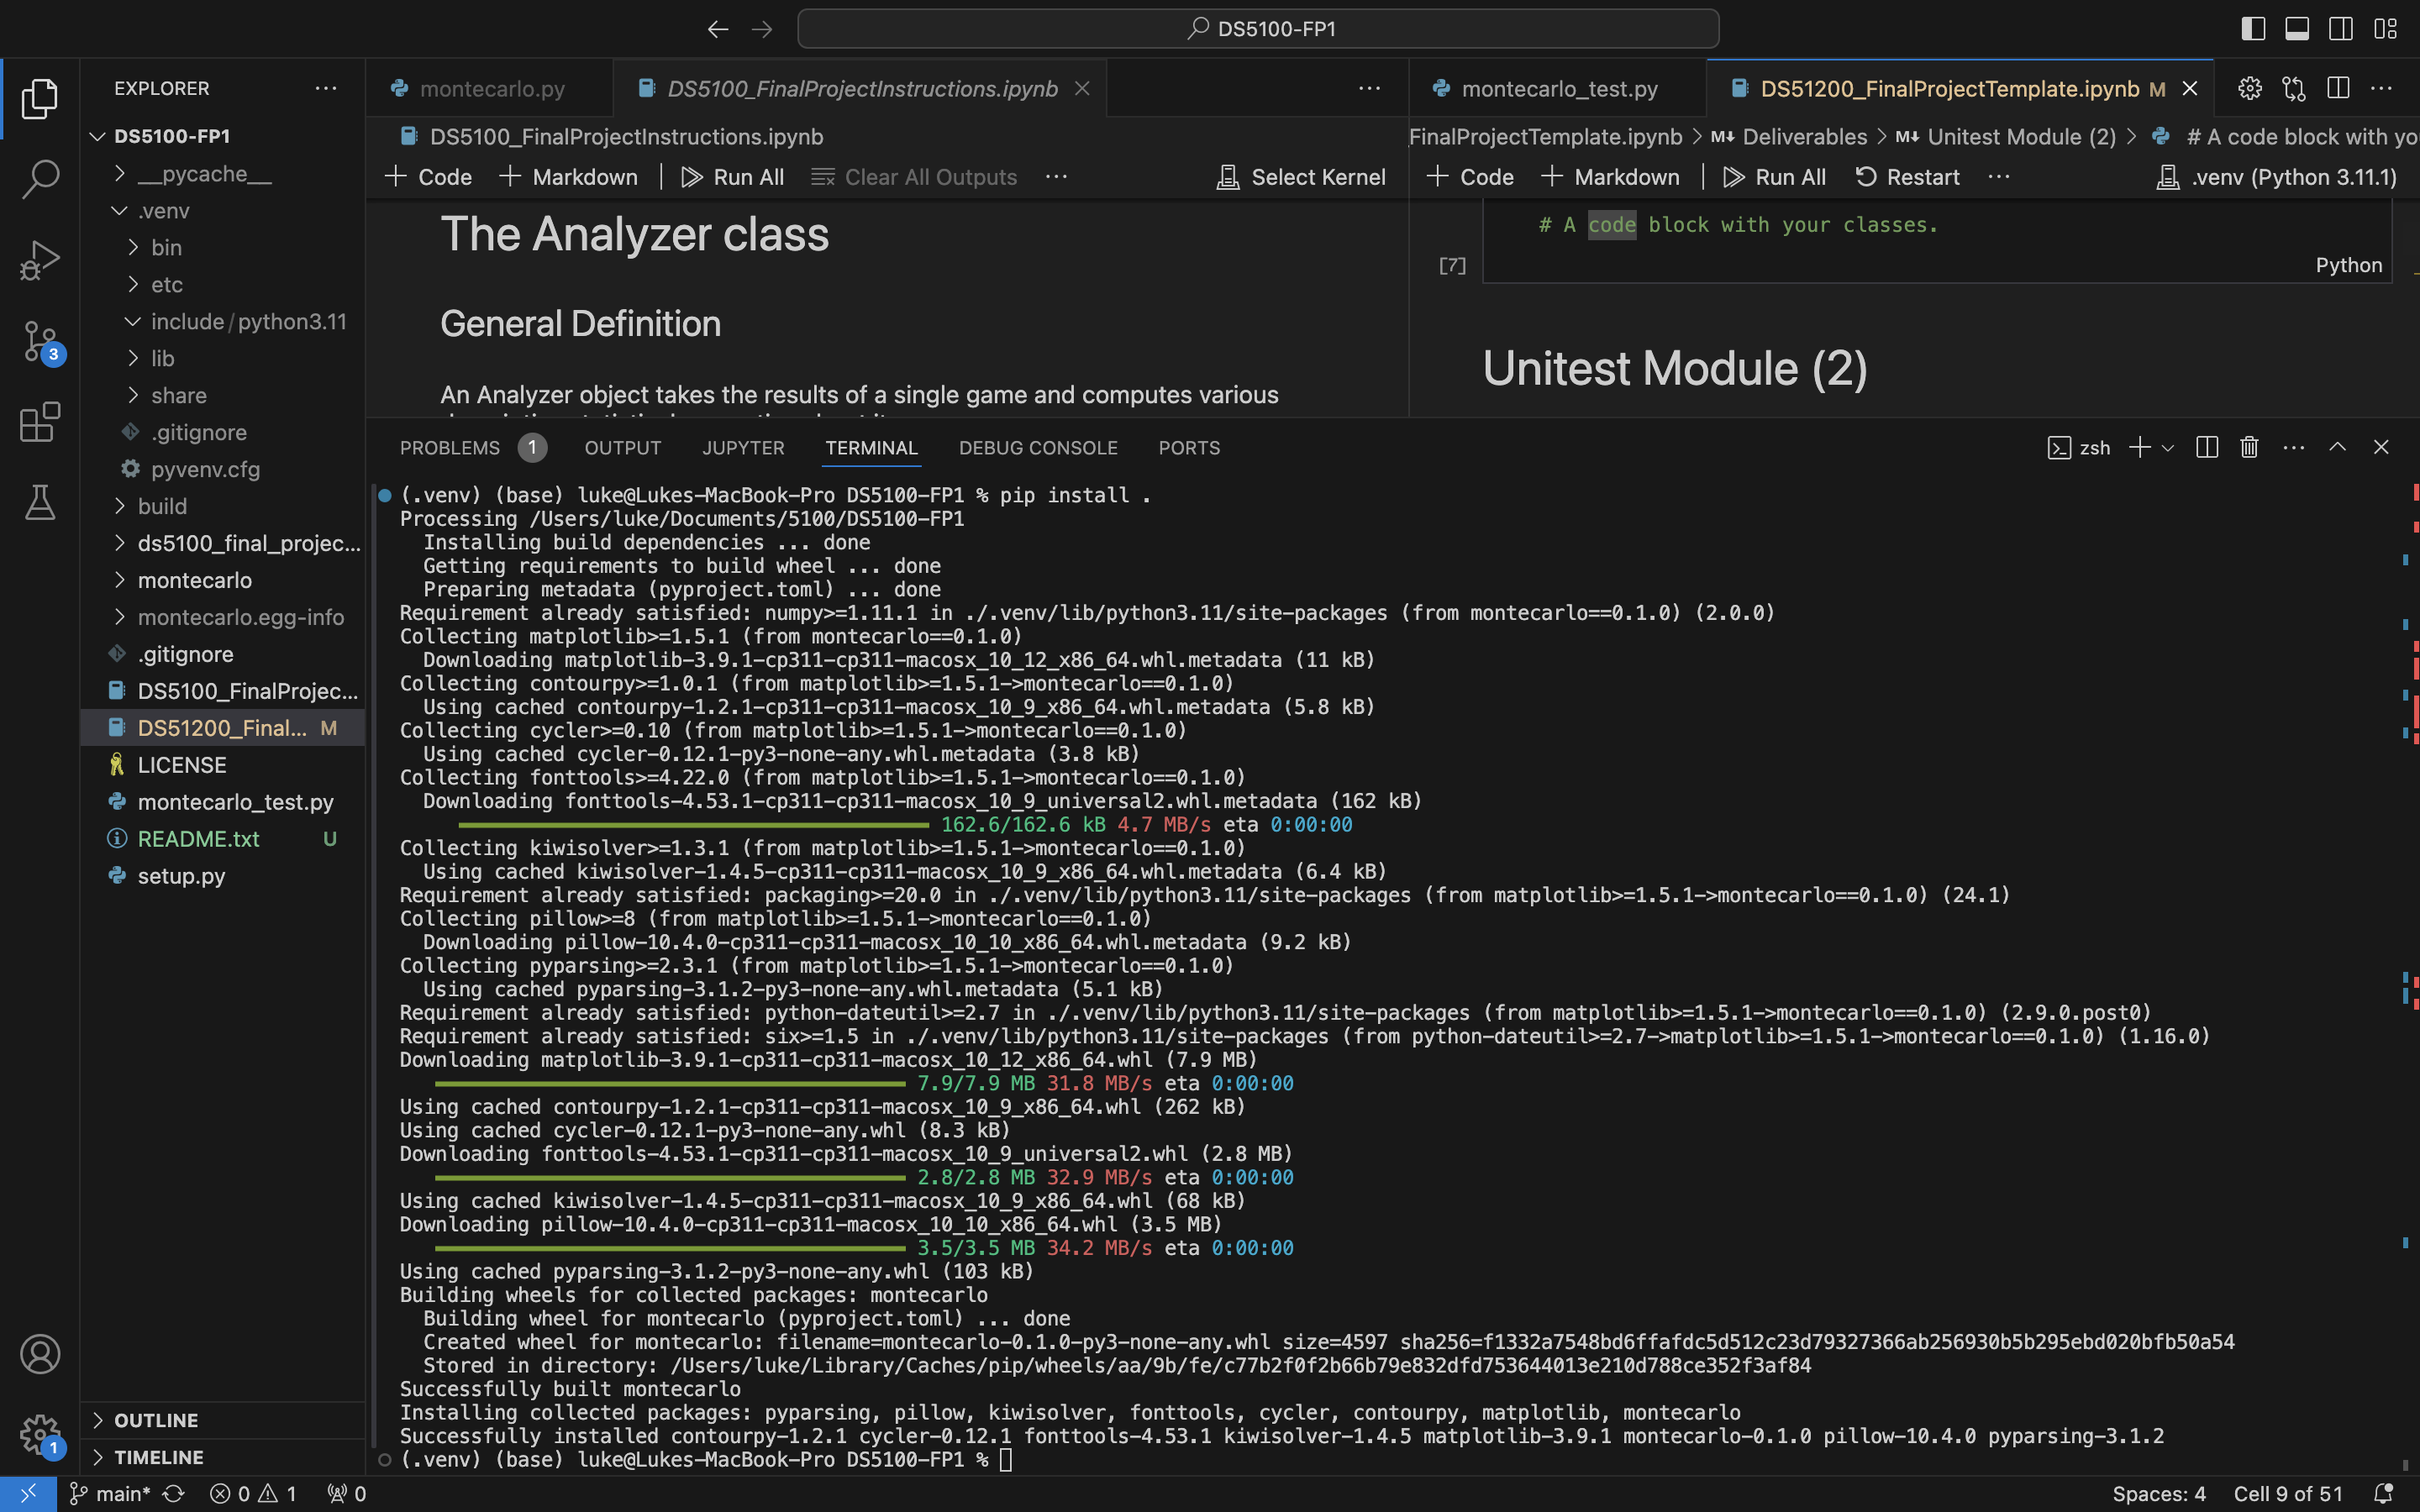


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [5]:
import numpy as np
faces =  np.array(['H', 'T'])
fair_coin1 = montecarlo.Die(faces)
unfair_coin1 = montecarlo.Die(faces)
unfair_coin1.change_weight('H', 5)


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [6]:
fair_coin2 = montecarlo.Die(faces)
dice_list = [fair_coin1, fair_coin2]
game1 = montecarlo.Game(dice_list)
game1.play(times_to_roll=1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
dice_list2 = [fair_coin1, unfair_coin1, unfair_coin1]
game2 = montecarlo.Game(dice_list2)
game2.play(times_to_roll=1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [8]:
analyze1 = montecarlo.Analyzer(game1)
jackpots1 = analyze1.jackpot()
analyze2 = montecarlo.Analyzer(game2)
jackpots2 = analyze2.jackpot()
print(f'jackpots for:\n 1000 flips 2 fair die: {jackpots1} \n 1000 flips 2 unfair, 1 fair die: {jackpots2}')

jackpots for:
 1000 flips 2 fair die: 533 
 1000 flips 2 unfair, 1 fair die: 364


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
freq1 = jackpots1 / len(game1.copy_df)
freq2 = jackpots2 / len(game2.copy_df)
print(f'frequency of jackpots game1: {freq1} \nfrequency of jackpots game2: {freq2}')

frequency of jackpots game1: 0.2665 
frequency of jackpots game2: 0.12133333333333333


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

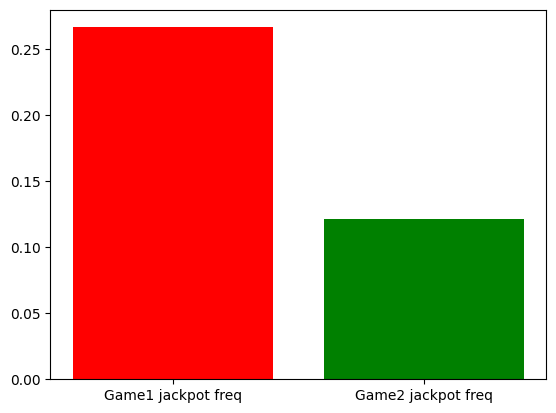

In [10]:
import matplotlib.pyplot as plt
labes = ['Game1 jackpot freq', 'Game2 jackpot freq']
values = [freq1, freq2]
plt.bar(labes, values, color =['red', 'green'])
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
faces =  np.array([1, 2, 3, 4, 5, 6])
die1 = montecarlo.Die(faces)
die2 = montecarlo.Die(faces)
die3 = montecarlo.Die(faces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.change_weight(face_to_change=6, weight_new=5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
die3.change_weight(face_to_change=1, weight_new=5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
dice_list = [die1, die1, die1, die1, die1]
game1 = montecarlo.Game(dice_list)
game1.play(times_to_roll=10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
dice_list = [die1, die1, die1, die2, die3]
game2 = montecarlo.Game(dice_list)
game2.play(times_to_roll=10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

jackpots for:
 10000 flips 2 fair die: 2 
 10000 flips 2 unfair, 1 fair die: 3
frequency of jackpots game1: 4e-05 
frequency of jackpots game2: 6e-05


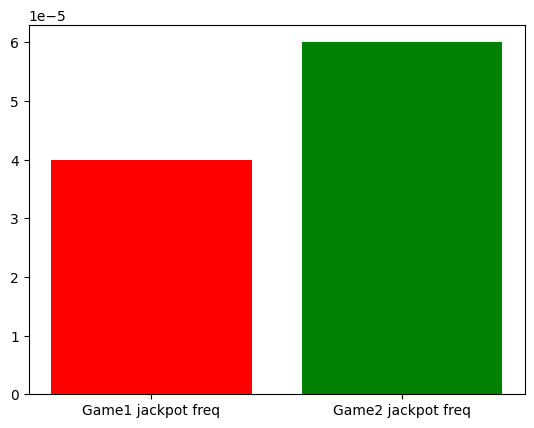

In [16]:
analyze1 = montecarlo.Analyzer(game1)
analyze2 = montecarlo.Analyzer(game2)
jackpots1 = analyze1.jackpot()
jackpots2 = analyze2.jackpot()
freq1 = jackpots1 / len(game1.copy_df)
freq2 = jackpots2 / len(game2.copy_df)
print(f'jackpots for:\n 10000 flips 2 fair die: {jackpots1} \n 10000 flips 2 unfair, 1 fair die: {jackpots2}')
print(f'frequency of jackpots game1: {freq1} \nfrequency of jackpots game2: {freq2}')

# Plot frequencies of jackpots
labes = ['Game1 jackpot freq', 'Game2 jackpot freq']
values = [freq1, freq2]
plt.bar(labes, values, color =['red', 'green'])
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [17]:
import pandas as pd
filepath = 'english_letters.txt'
df_letters = pd.read_csv(filepath, sep='\s+', names=['Letter', 'Frequency'])
faces =  np.array(df_letters.iloc[:, 0])
die_let = montecarlo.Die(faces)
for i in range(26):
    die_let.change_weight(df_letters.iloc[i, 0], df_letters.iloc[i, 1])
print(die_let._df.iloc[0:5])

        values
E  529117365.0
T  390965105.0
A  374061888.0
O  326627740.0
I  320410057.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [37]:
die_list = [die_let] * 4
game1 = montecarlo.Game(die_list)
game1.play(times_to_roll=1000)


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [38]:
url = 'scrabble_words.txt'
scrabble_df = pd.read_csv(url, header=None)
analyze1 = montecarlo.Analyzer(game1)
multiindex = analyze1.permutation_count().index[:]
permutation = ""
words = 0

for index in multiindex:
    perm = ''.join(index)
    if perm in scrabble_df[0].values:
        words += 1
    
print(words)

56


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [41]:
die_list = [die_let] * 5
game2= montecarlo.Game(die_list)
game2.play(times_to_roll=1000)

analyze2 =  montecarlo.Analyzer(game2)
multiindex = analyze2.permutation_count().index[:]
permutation = ""
words = 0

for index in multiindex:
    perm = ''.join(index)
    if perm in scrabble_df[0].values:
        words += 1
    
print(words)


7


### Task 4 Response
* The game with 4 letter "dice" produced more words (56), than the game with 5 letter "dice" (7)